## 相关性分析总结
- 目标：分析广告效果的五个指标与销售数据的相关性，从数据上说明我们用这五个指标衡量广告效果的合理性。
- 结果总结：1）天猫的相关性表现比京东好；2）天猫的一些指标有显著或中度线性关系，但也存在指标可以认为无线性关系；3）另外京东各指标基本都没有线性关系。
- 后续计划：当前相关性不是很显著的原因可能是因为数据中存在较多0值，或销售数据与广告投放存在时间上的滞后性等；计划把数据按一周或两周合并，再重新分析。
- 可能存在问题：京东数据目前的相关性很差，不知道是否与广告类型的合并有关。例如，海投、快车、直投这三部分广告都有广告小类的合并，具体如下:\
#dummy1=展位（京东展位）\
#dummy2=触点（购物触点）\
#dummy3=海投（PUSH海投，海投计划，海投新品，经典海投，首焦海投）\
#dummy4=快车（快车，京选店铺）\
#dummy5=其他（京东直投，直投）

## 读取数据

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [127]:
data_jdhthz = pd.read_csv('京东各类海投.csv',encoding='gb18030')
data_jdcd = pd.read_csv('京东触点.csv',encoding='gb18030')
data_jdkchz = pd.read_csv('京东快车汇总.csv',encoding='gb18030')
data_jdzw = pd.read_csv('京东展位.csv',encoding='gb18030')
data_jdzt = pd.read_csv('京东直投.csv',encoding='gb18030')

In [128]:
data_tmcjtj = pd.read_csv('天猫超级推荐.csv',encoding='gb18030')
data_tmpxb = pd.read_csv('天猫品销宝.csv',encoding='gb18030')
data_tmztc = pd.read_csv('天猫直通车.csv',encoding='gb18030')
data_tmzz = pd.read_csv('天猫钻展.csv',encoding='gb18030')

In [129]:
type(data_jdzt)

pandas.core.frame.DataFrame

In [130]:
sales_jd = pd.read_csv('1905-2103京东销售数据.csv',encoding='gb18030')
sales_tmgq = pd.read_csv('1910-2103天猫官旗销售数据.csv',encoding='gb18030')
sales_all = pd.read_csv('1909-2103销售数据.csv',encoding='gb18030')

## 相关系数判断

 - -----------------------------
 - |r|<0.3 不存在线性关系
 - 0.3<|r|<0.5  低度线性关系
 - 0.5<|r|<0.8  显著线性关系
 - |r|>0.8  高度线性关系
 - ------------------------------

## 京东

### 京东海投汇总

In [9]:
data_jdhthz

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2019/5/6,各类海投,285.494506,0.054491,0.000000,0.000000,8.934426
1,2019/5/7,各类海投,0.000000,0.025015,0.000000,0.000000,0.000000
2,2019/5/8,各类海投,0.000000,0.007844,0.000000,0.000000,0.000000
3,2019/5/9,各类海投,3092.857143,0.007133,0.000000,0.000000,7.888889
4,2019/5/10,各类海投,105.523964,0.005499,0.000000,0.000000,5.500000
...,...,...,...,...,...,...,...
665,2021/3/27,各类海投,703.851444,0.024707,0.587963,4.535714,0.190586
666,2021/3/28,各类海投,488.820639,0.024360,0.422535,6.666667,0.384858
667,2021/3/29,各类海投,1650.102082,0.019463,0.409193,4.055556,0.193261
668,2021/3/30,各类海投,968.074997,0.024695,0.398900,4.264706,0.264171


In [72]:
sales_jd

,日期,合计
0,2019/5/21,"1,121"
1,2019/5/22,303
2,2019/5/23,326
3,2019/5/24,113
4,2019/5/25,57
...,...,...
676,2021/3/27,264
677,2021/3/28,184
678,2021/3/29,415
679,2021/3/30,384


In [79]:
sales = []
size = len(data_jdhthz)
for i in range(size):
    date_tmp = data_jdhthz['日期'][i]
    if date_tmp in list(sales_jd['日期']):
        index_tmp = sales_jd[sales_jd['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_jd['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.NaN
    sales.append(sales_tmp)
sales_jdhthz = pd.DataFrame(sales)
data_jdhthz['销售数据'] = sales_jdhthz
data_jdhthz        

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数,销售数据
0,2019/5/6,各类海投,285.494506,0.054491,0.000000,0.000000,8.934426,NaN
1,2019/5/7,各类海投,0.000000,0.025015,0.000000,0.000000,0.000000,NaN
2,2019/5/8,各类海投,0.000000,0.007844,0.000000,0.000000,0.000000,NaN
3,2019/5/9,各类海投,3092.857143,0.007133,0.000000,0.000000,7.888889,NaN
4,2019/5/10,各类海投,105.523964,0.005499,0.000000,0.000000,5.500000,NaN
...,...,...,...,...,...,...,...,...
665,2021/3/27,各类海投,703.851444,0.024707,0.587963,4.535714,0.190586,264.0
666,2021/3/28,各类海投,488.820639,0.024360,0.422535,6.666667,0.384858,184.0
667,2021/3/29,各类海投,1650.102082,0.019463,0.409193,4.055556,0.193261,415.0
668,2021/3/30,各类海投,968.074997,0.024695,0.398900,4.264706,0.264171,384.0


In [80]:
data_jdhthz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   日期       670 non-null    object 
 1   广告形式     670 non-null    object 
 2   点击率/转化率  670 non-null    float64
 3   销售额/ROI  670 non-null    float64
 4   点击量/展现量  670 non-null    float64
 5   加购数/点击量  670 non-null    float64
 6   订单数/加购数  670 non-null    float64
 7   销售数据     652 non-null    float64
dtypes: float64(6), object(2)
memory usage: 42.0+ KB


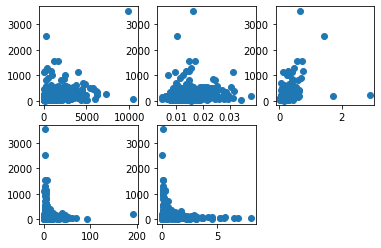

In [90]:
x1 = data_jdhthz['点击率/转化率']
x2 = data_jdhthz['销售额/ROI']
x3 = data_jdhthz['点击量/展现量']
x4 = data_jdhthz['加购数/点击量']
x5 = data_jdhthz['订单数/加购数']
y = data_jdhthz['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [93]:
jdhthz = data_jdhthz.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(jdhthz['点击率/转化率'])
xs.append(jdhthz['销售额/ROI'])
xs.append(jdhthz['点击量/展现量'])
xs.append(jdhthz['加购数/点击量'])
xs.append(jdhthz['订单数/加购数'])
ys = jdhthz['销售数据']

In [99]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r =  0.332，p值 =  0.000
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.174，p值 =  0.000
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.446，p值 =  0.000
加购数/点击量 与 销售数据 的相关性分析: 相关系数r = -0.175，p值 =  0.000
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.282，p值 =  0.000


- 虽然p值都小于0.05，但没有明显相关关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.113598  0.211121 -0.011563 -0.099894  0.332488
销售额/ROI  0.113598  1.000000  0.390585 -0.008239 -0.037333  0.173935
点击量/展现量  0.211121  0.390585  1.000000  0.306893 -0.256529  0.445676
加购数/点击量 -0.011563 -0.008239  0.306893  1.000000  0.614959 -0.175000
订单数/加购数 -0.099894 -0.037333 -0.256529  0.614959  1.000000 -0.281602
销售数据     0.332488  0.173935  0.445676 -0.175000 -0.281602  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

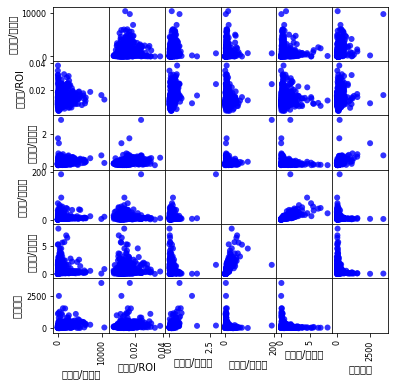

In [168]:
# 多维数据相关性分析
# 导入数据
df = jdhthz[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 京东快车汇总

In [54]:
data_jdkchz

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2019/5/6,快车,0.000000,0.009454,0.021739,0.000000,0.000000
1,2019/5/7,快车,0.000000,0.007389,0.010796,0.000000,0.000000
2,2019/5/8,快车,0.000000,0.007115,0.012997,0.000000,0.000000
3,2019/5/9,快车,2361.818182,0.007713,0.014901,18.000000,9.625000
4,2019/5/10,快车,0.000000,0.007946,0.029021,0.000000,0.000000
...,...,...,...,...,...,...,...
674,2021/3/27,快车,59.794298,0.034370,0.443723,9.318182,0.722689
675,2021/3/28,快车,232.403538,0.030614,0.387863,7.000000,0.552347
676,2021/3/29,快车,77.600481,0.035452,0.394422,5.210526,0.468956
677,2021/3/30,快车,37.523056,0.036991,0.495798,8.740741,0.652557


In [82]:
sales = []
size = len(data_jdkchz)
for i in range(size):
    date_tmp = data_jdkchz['日期'][i]
    if date_tmp in list(sales_jd['日期']):
        index_tmp = sales_jd[sales_jd['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_jd['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_jdkchz = pd.DataFrame(sales)
data_jdkchz['销售数据'] = sales_jdkchz
data_jdkchz   

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数,销售数据
0,2019/5/6,快车,0.000000,0.009454,0.021739,0.000000,0.000000,NaN
1,2019/5/7,快车,0.000000,0.007389,0.010796,0.000000,0.000000,NaN
2,2019/5/8,快车,0.000000,0.007115,0.012997,0.000000,0.000000,NaN
3,2019/5/9,快车,2361.818182,0.007713,0.014901,18.000000,9.625000,NaN
4,2019/5/10,快车,0.000000,0.007946,0.029021,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...
674,2021/3/27,快车,59.794298,0.034370,0.443723,9.318182,0.722689,264.0
675,2021/3/28,快车,232.403538,0.030614,0.387863,7.000000,0.552347,184.0
676,2021/3/29,快车,77.600481,0.035452,0.394422,5.210526,0.468956,415.0
677,2021/3/30,快车,37.523056,0.036991,0.495798,8.740741,0.652557,384.0


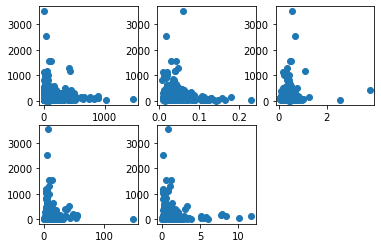

In [101]:
x1 = data_jdkchz['点击率/转化率']
x2 = data_jdkchz['销售额/ROI']
x3 = data_jdkchz['点击量/展现量']
x4 = data_jdkchz['加购数/点击量']
x5 = data_jdkchz['订单数/加购数']
y = data_jdkchz['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [102]:
jdkchz = data_jdkchz.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(jdkchz['点击率/转化率'])
xs.append(jdkchz['销售额/ROI'])
xs.append(jdkchz['点击量/展现量'])
xs.append(jdkchz['加购数/点击量'])
xs.append(jdkchz['订单数/加购数'])
ys = jdkchz['销售数据']

In [103]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.113，p值 =  0.004
销售额/ROI 与 销售数据 的相关性分析: 相关系数r = -0.033，p值 =  0.391
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.154，p值 =  0.000
加购数/点击量 与 销售数据 的相关性分析: 相关系数r = -0.074，p值 =  0.057
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.131，p值 =  0.001


- 虽然有四项的p值都小于0.05，但没有明显相关关系

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.124959  0.011228  0.098906  0.148600 -0.112726
销售额/ROI  0.124959  1.000000  0.454025  0.239545  0.490976 -0.033401
点击量/展现量  0.011228  0.454025  1.000000  0.446825  0.143870  0.153819
加购数/点击量  0.098906  0.239545  0.446825  1.000000  0.723831 -0.074036
订单数/加购数  0.148600  0.490976  0.143870  0.723831  1.000000 -0.131207
销售数据    -0.112726 -0.033401  0.153819 -0.074036 -0.131207  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

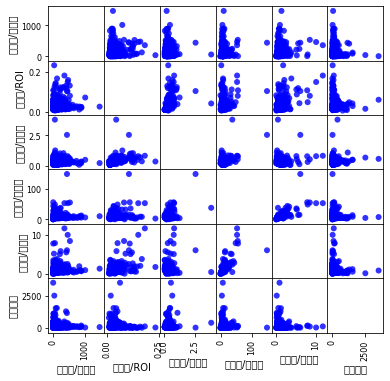

In [169]:
# 多维数据相关性分析
# 导入数据
df = jdkchz[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 京东触点

In [56]:
data_jdcd

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2019/5/9,购物触点,0.000000,0.000000,0.009126,0.028302,0.000000
1,2019/5/10,购物触点,0.000000,0.000000,0.008149,0.027273,0.000000
2,2019/5/11,购物触点,0.000000,0.000000,0.008323,0.025352,0.000000
3,2019/5/12,购物触点,0.000000,0.000000,0.006441,0.017949,0.000000
4,2019/5/13,购物触点,0.000000,0.000000,0.006849,0.102041,0.000000
...,...,...,...,...,...,...,...
622,2021/3/27,购物触点,0.307018,1020.708826,0.010513,0.235043,6.875000
623,2021/3/28,购物触点,0.252632,1010.278251,0.009648,0.236287,6.222222
624,2021/3/29,购物触点,0.343396,1822.550832,0.009142,0.185676,7.000000
625,2021/3/30,购物触点,0.449275,1316.436637,0.009311,0.153846,7.428571


In [83]:
sales = []
size = len(data_jdcd)
for i in range(size):
    date_tmp = data_jdcd['日期'][i]
    if date_tmp in list(sales_jd['日期']):
        index_tmp = sales_jd[sales_jd['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_jd['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_jdcd = pd.DataFrame(sales)
data_jdcd['销售数据'] = sales_jdcd
data_jdcd  

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数,销售数据
0,2019/5/9,购物触点,0.000000,0.000000,0.009126,0.028302,0.000000,NaN
1,2019/5/10,购物触点,0.000000,0.000000,0.008149,0.027273,0.000000,NaN
2,2019/5/11,购物触点,0.000000,0.000000,0.008323,0.025352,0.000000,NaN
3,2019/5/12,购物触点,0.000000,0.000000,0.006441,0.017949,0.000000,NaN
4,2019/5/13,购物触点,0.000000,0.000000,0.006849,0.102041,0.000000,NaN
...,...,...,...,...,...,...,...,...
622,2021/3/27,购物触点,0.307018,1020.708826,0.010513,0.235043,6.875000,264.0
623,2021/3/28,购物触点,0.252632,1010.278251,0.009648,0.236287,6.222222,184.0
624,2021/3/29,购物触点,0.343396,1822.550832,0.009142,0.185676,7.000000,415.0
625,2021/3/30,购物触点,0.449275,1316.436637,0.009311,0.153846,7.428571,384.0


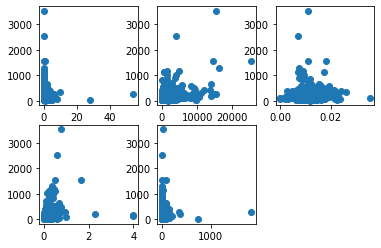

In [108]:
x1 = data_jdcd['点击率/转化率']
x2 = data_jdcd['销售额/ROI']
x3 = data_jdcd['点击量/展现量']
x4 = data_jdcd['加购数/点击量']
x5 = data_jdcd['订单数/加购数']
y = data_jdcd['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [113]:
jdcd = data_jdcd.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(jdcd['点击率/转化率'])
xs.append(jdcd['销售额/ROI'])
xs.append(jdcd['点击量/展现量'])
xs.append(jdcd['加购数/点击量'])
xs.append(jdcd['订单数/加购数'])
ys = jdcd['销售数据']

In [114]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.049，p值 =  0.223
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.412，p值 =  0.000
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.058，p值 =  0.152
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.235，p值 =  0.000
订单数/加购数 与 销售数据 的相关性分析: 相关系数r =  0.003，p值 =  0.948


- 只有两项的p值都小于0.05，其中：
- “销售额/ROI”的相关性系数为0.412，有中度线性关系；
- “加购数/点击量”的相关性系数为0.235，可以认为无线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.358800  0.249532  0.080630  0.945857 -0.049474
销售额/ROI  0.358800  1.000000  0.090802  0.252616  0.410818  0.411962
点击量/展现量  0.249532  0.090802  1.000000  0.093344  0.240991  0.058153
加购数/点击量  0.080630  0.252616  0.093344  1.000000  0.191334  0.235484
订单数/加购数  0.945857  0.410818  0.240991  0.191334  1.000000  0.002626
销售数据    -0.049474  0.411962  0.058153  0.235484  0.002626  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

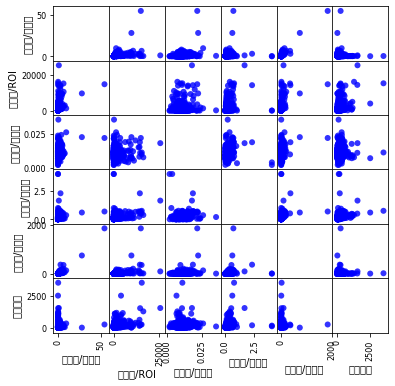

In [172]:
# 多维数据相关性分析
# 导入数据
df = jdcd[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 京东展位

In [58]:
data_jdzw

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2019/5/11,京东展位,0.000000,0.0,0.004003,0.000000,0.0
1,2019/5/12,京东展位,0.000000,0.0,0.004933,0.001435,0.0
2,2019/5/13,京东展位,0.000000,0.0,0.004240,0.006641,0.0
3,2019/5/14,京东展位,0.000000,0.0,0.003161,0.005442,0.0
4,2019/5/15,京东展位,0.000000,0.0,0.003309,0.006565,0.0
...,...,...,...,...,...,...,...
226,2020/4/26,京东展位,0.804348,NaN,0.003697,0.027397,6.0
227,2020/4/27,京东展位,0.000000,NaN,0.003760,0.009009,0.0
228,2020/4/28,京东展位,0.000000,NaN,0.006093,0.025761,0.0
229,2020/4/29,京东展位,0.000000,NaN,0.005108,0.029520,0.0


In [84]:
sales = []
size = len(data_jdzw)
for i in range(size):
    date_tmp = data_jdzw['日期'][i]
    if date_tmp in list(sales_jd['日期']):
        index_tmp = sales_jd[sales_jd['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_jd['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_jdzw = pd.DataFrame(sales)
data_jdzw['销售数据'] = sales_jdzw
data_jdzw 

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数,销售数据
0,2019/5/11,京东展位,0.000000,0.0,0.004003,0.000000,0.0,NaN
1,2019/5/12,京东展位,0.000000,0.0,0.004933,0.001435,0.0,NaN
2,2019/5/13,京东展位,0.000000,0.0,0.004240,0.006641,0.0,NaN
3,2019/5/14,京东展位,0.000000,0.0,0.003161,0.005442,0.0,NaN
4,2019/5/15,京东展位,0.000000,0.0,0.003309,0.006565,0.0,NaN
...,...,...,...,...,...,...,...,...
226,2020/4/26,京东展位,0.804348,NaN,0.003697,0.027397,6.0,121.0
227,2020/4/27,京东展位,0.000000,NaN,0.003760,0.009009,0.0,135.0
228,2020/4/28,京东展位,0.000000,NaN,0.006093,0.025761,0.0,196.0
229,2020/4/29,京东展位,0.000000,NaN,0.005108,0.029520,0.0,128.0


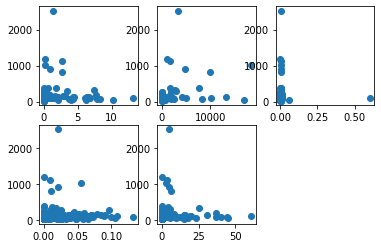

In [112]:
x1 = data_jdzw['点击率/转化率']
x2 = data_jdzw['销售额/ROI']
x3 = data_jdzw['点击量/展现量']
x4 = data_jdzw['加购数/点击量']
x5 = data_jdzw['订单数/加购数']
y = data_jdzw['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [115]:
jdzw = data_jdzw.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(jdzw['点击率/转化率'])
xs.append(jdzw['销售额/ROI'])
xs.append(jdzw['点击量/展现量'])
xs.append(jdzw['加购数/点击量'])
xs.append(jdzw['订单数/加购数'])
ys = jdzw['销售数据']

In [116]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r =  0.038，p值 =  0.682
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.318，p值 =  0.000
点击量/展现量 与 销售数据 的相关性分析: 相关系数r = -0.041，p值 =  0.659
加购数/点击量 与 销售数据 的相关性分析: 相关系数r = -0.031，p值 =  0.743
订单数/加购数 与 销售数据 的相关性分析: 相关系数r =  0.033，p值 =  0.726


- 只有一项的p值都小于0.05，“销售额/ROI”的相关系数为0.318，可以认为有中度线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.559332  0.086240 -0.080644  0.721044  0.038230
销售额/ROI  0.559332  1.000000  0.061043  0.004064  0.247640  0.318249
点击量/展现量  0.086240  0.061043  1.000000 -0.039450  0.017745 -0.041212
加购数/点击量 -0.080644  0.004064 -0.039450  1.000000  0.092321 -0.030677
订单数/加购数  0.721044  0.247640  0.017745  0.092321  1.000000  0.032772
销售数据     0.038230  0.318249 -0.041212 -0.030677  0.032772  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

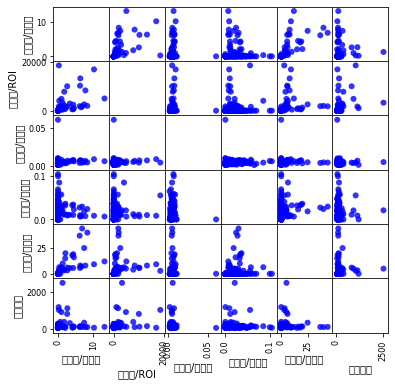

In [170]:
# 多维数据相关性分析
# 导入数据
df = jdzw[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 京东直投

In [121]:
data_jdzt

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2019/5/6,京东直投,0.0,0.000000,0.005885,0.001285,0.000000
1,2019/5/7,京东直投,0.0,0.000000,0.006006,0.001976,0.000000
2,2019/5/8,京东直投,85.0,4997.500000,0.008473,0.002214,17.000000
3,2019/5/9,京东直投,0.0,0.000000,0.014110,0.000518,0.000000
4,2019/5/10,京东直投,34.0,1495.281933,0.017041,0.002333,5.166667
...,...,...,...,...,...,...,...
470,2021/2/24,京东直投,0.0,0.000000,0.041238,0.001374,0.000000
471,2021/2/25,京东直投,0.0,0.000000,0.048780,0.001291,0.000000
472,2021/2/26,京东直投,NaN,0.000000,0.000000,0.000000,0.000000
473,2021/2/27,京东直投,NaN,0.000000,0.000000,0.000000,0.000000


In [122]:
sales = []
size = len(data_jdzt)
for i in range(size):
    date_tmp = data_jdzt['日期'][i]
    if date_tmp in list(sales_jd['日期']):
        index_tmp = sales_jd[sales_jd['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_jd['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_jdzt = pd.DataFrame(sales)
data_jdzt['销售数据'] = sales_jdzt
data_jdzt 

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数,销售数据
0,2019/5/6,京东直投,0.0,0.000000,0.005885,0.001285,0.000000,NaN
1,2019/5/7,京东直投,0.0,0.000000,0.006006,0.001976,0.000000,NaN
2,2019/5/8,京东直投,85.0,4997.500000,0.008473,0.002214,17.000000,NaN
3,2019/5/9,京东直投,0.0,0.000000,0.014110,0.000518,0.000000,NaN
4,2019/5/10,京东直投,34.0,1495.281933,0.017041,0.002333,5.166667,NaN
...,...,...,...,...,...,...,...,...
470,2021/2/24,京东直投,0.0,0.000000,0.041238,0.001374,0.000000,234.0
471,2021/2/25,京东直投,0.0,0.000000,0.048780,0.001291,0.000000,382.0
472,2021/2/26,京东直投,NaN,0.000000,0.000000,0.000000,0.000000,258.0
473,2021/2/27,京东直投,NaN,0.000000,0.000000,0.000000,0.000000,113.0


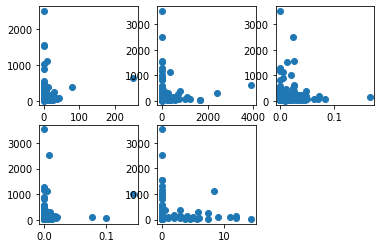

In [123]:
x1 = data_jdzt['点击率/转化率']
x2 = data_jdzt['销售额/ROI']
x3 = data_jdzt['点击量/展现量']
x4 = data_jdzt['加购数/点击量']
x5 = data_jdzt['订单数/加购数']
y = data_jdzt['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [124]:
jdzt = data_jdzt.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(jdzt['点击率/转化率'])
xs.append(jdzt['销售额/ROI'])
xs.append(jdzt['点击量/展现量'])
xs.append(jdzt['加购数/点击量'])
xs.append(jdzt['订单数/加购数'])
ys = jdzt['销售数据']

In [125]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r =  0.012，p值 =  0.883
销售额/ROI 与 销售数据 的相关性分析: 相关系数r = -0.016，p值 =  0.851
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.011，p值 =  0.891
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.211，p值 =  0.011
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.001，p值 =  0.988


- 只有一项的p值都小于0.05，但没有明显相关关系

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.460223 -0.015724 -0.015902  0.628481  0.012316
销售额/ROI  0.460223  1.000000 -0.064290  0.043070  0.658037 -0.015764
点击量/展现量 -0.015724 -0.064290  1.000000 -0.088465 -0.160744  0.011436
加购数/点击量 -0.015902  0.043070 -0.088465  1.000000  0.073834  0.211429
订单数/加购数  0.628481  0.658037 -0.160744  0.073834  1.000000 -0.001300
销售数据     0.012316 -0.015764  0.011436  0.211429 -0.001300  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

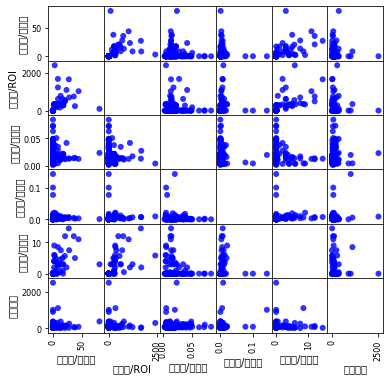

In [171]:
# 多维数据相关性分析
# 导入数据
df = jdzt[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

## 天猫

### 天猫品销宝

In [131]:
data_tmpxb

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2020/11/1,品销宝,0.664170,1761.00,0.204721,0.703529,2.282443
1,2020/11/2,品销宝,1.277527,1680.96,0.213437,0.581114,3.478261
2,2020/11/3,品销宝,1.455840,1639.36,0.214508,0.420290,2.852459
3,2020/11/4,品销宝,1.358449,1579.31,0.221143,0.372093,2.285714
4,2020/11/5,品销宝,1.222329,1508.24,0.185921,0.391586,2.574468
...,...,...,...,...,...,...,...
115,2021/2/24,品销宝,NaN,NaN,0.000000,0.000000,0.000000
116,2021/2/25,品销宝,NaN,NaN,0.000000,0.000000,0.000000
117,2021/2/26,品销宝,NaN,NaN,0.000000,0.000000,0.000000
118,2021/2/27,品销宝,NaN,NaN,0.000000,0.000000,0.000000


In [141]:
sales = []
size = len(data_tmpxb)
for i in range(size):
    date_tmp = data_tmpxb['日期'][i]
    if date_tmp in list(sales_tmgq['日期']):
        index_tmp = sales_tmgq[sales_tmgq['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_tmgq['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_tmpxb = pd.DataFrame(sales)
data_tmpxb['销售数据'] = sales_tmpxb
data_tmpxb

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数,销售数据
0,2020/11/1,品销宝,0.664170,1761.00,0.204721,0.703529,2.282443,2020.0
1,2020/11/2,品销宝,1.277527,1680.96,0.213437,0.581114,3.478261,295.0
2,2020/11/3,品销宝,1.455840,1639.36,0.214508,0.420290,2.852459,408.0
3,2020/11/4,品销宝,1.358449,1579.31,0.221143,0.372093,2.285714,68.0
4,2020/11/5,品销宝,1.222329,1508.24,0.185921,0.391586,2.574468,59.0
...,...,...,...,...,...,...,...,...
115,2021/2/24,品销宝,NaN,NaN,0.000000,0.000000,0.000000,183.0
116,2021/2/25,品销宝,NaN,NaN,0.000000,0.000000,0.000000,118.0
117,2021/2/26,品销宝,NaN,NaN,0.000000,0.000000,0.000000,105.0
118,2021/2/27,品销宝,NaN,NaN,0.000000,0.000000,0.000000,51.0


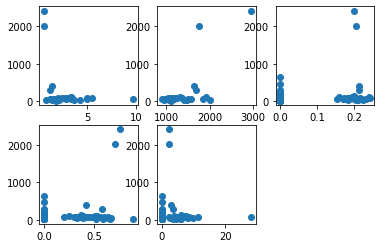

In [142]:
x1 = data_tmpxb['点击率/转化率']
x2 = data_tmpxb['销售额/ROI']
x3 = data_tmpxb['点击量/展现量']
x4 = data_tmpxb['加购数/点击量']
x5 = data_tmpxb['订单数/加购数']
y = data_tmpxb['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [143]:
tmpxb = data_tmpxb.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(tmpxb['点击率/转化率'])
xs.append(tmpxb['销售额/ROI'])
xs.append(tmpxb['点击量/展现量'])
xs.append(tmpxb['加购数/点击量'])
xs.append(tmpxb['订单数/加购数'])
ys = tmpxb['销售数据']

In [144]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.328，p值 =  0.077
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.687，p值 =  0.000
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.061，p值 =  0.749
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.388，p值 =  0.034
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.252，p值 =  0.179


- 有两项的p值都小于0.05：
- “销售额/ROI”的相关系数为0.687，有显著线性关系；
- “加购数/点击量”的相关系数为0.388，有低度线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000 -0.456951  0.233922 -0.289584  0.864707 -0.327917
销售额/ROI -0.456951  1.000000  0.331663  0.474047 -0.392492  0.686508
点击量/展现量  0.233922  0.331663  1.000000  0.174609  0.121502  0.060884
加购数/点击量 -0.289584  0.474047  0.174609  1.000000  0.112910  0.387819
订单数/加购数  0.864707 -0.392492  0.121502  0.112910  1.000000 -0.252017
销售数据    -0.327917  0.686508  0.060884  0.387819 -0.252017  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

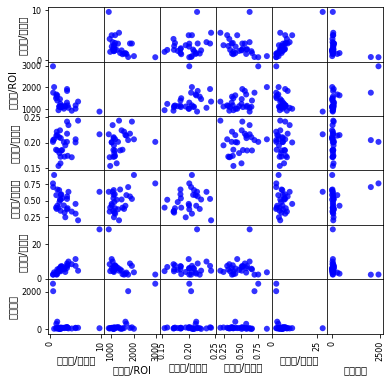

In [173]:
# 多维数据相关性分析
# 导入数据
df = tmpxb[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 天猫超级推荐

In [135]:
data_tmcjtj

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2020/11/1,超级推荐,0.993748,13940.68,0.015685,0.055770,3.533333
1,2020/11/2,超级推荐,0.628610,7119.11,0.009377,0.047136,3.160000
2,2020/11/3,超级推荐,1.060233,8613.18,0.009019,0.035444,4.166667
3,2020/11/4,超级推荐,9.850410,5786.13,0.006922,0.042164,60.000000
4,2020/11/5,超级推荐,7.301877,6671.29,0.008641,0.044379,37.500000
...,...,...,...,...,...,...,...
115,2021/2/24,超级推荐,NaN,NaN,0.000000,0.000000,0.000000
116,2021/2/25,超级推荐,NaN,NaN,0.000000,0.000000,0.000000
117,2021/2/26,超级推荐,NaN,NaN,0.000000,0.000000,0.000000
118,2021/2/27,超级推荐,NaN,NaN,0.000000,0.000000,0.000000


In [145]:
sales = []
size = len(data_tmcjtj)
for i in range(size):
    date_tmp = data_tmcjtj['日期'][i]
    if date_tmp in list(sales_tmgq['日期']):
        index_tmp = sales_tmgq[sales_tmgq['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_tmgq['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_tmcjtj = pd.DataFrame(sales)
data_tmcjtj['销售数据'] = sales_tmcjtj
data_tmcjtj

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数,销售数据
0,2020/11/1,超级推荐,0.993748,13940.68,0.015685,0.055770,3.533333,2020.0
1,2020/11/2,超级推荐,0.628610,7119.11,0.009377,0.047136,3.160000,295.0
2,2020/11/3,超级推荐,1.060233,8613.18,0.009019,0.035444,4.166667,408.0
3,2020/11/4,超级推荐,9.850410,5786.13,0.006922,0.042164,60.000000,68.0
4,2020/11/5,超级推荐,7.301877,6671.29,0.008641,0.044379,37.500000,59.0
...,...,...,...,...,...,...,...,...
115,2021/2/24,超级推荐,NaN,NaN,0.000000,0.000000,0.000000,183.0
116,2021/2/25,超级推荐,NaN,NaN,0.000000,0.000000,0.000000,118.0
117,2021/2/26,超级推荐,NaN,NaN,0.000000,0.000000,0.000000,105.0
118,2021/2/27,超级推荐,NaN,NaN,0.000000,0.000000,0.000000,51.0


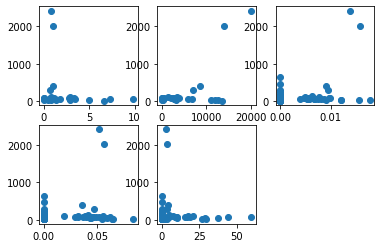

In [146]:
x1 = data_tmcjtj['点击率/转化率']
x2 = data_tmcjtj['销售额/ROI']
x3 = data_tmcjtj['点击量/展现量']
x4 = data_tmcjtj['加购数/点击量']
x5 = data_tmcjtj['订单数/加购数']
y = data_tmcjtj['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [147]:
tmcjtj = data_tmcjtj.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(tmcjtj['点击率/转化率'])
xs.append(tmcjtj['销售额/ROI'])
xs.append(tmcjtj['点击量/展现量'])
xs.append(tmcjtj['加购数/点击量'])
xs.append(tmcjtj['订单数/加购数'])
ys = tmcjtj['销售数据']

In [148]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.167，p值 =  0.378
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.640，p值 =  0.000
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.458，p值 =  0.011
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.099，p值 =  0.604
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.217，p值 =  0.250


- 有两项的p值都小于0.05，其中：
- “销售额/ROI”的相关系数为0.64，有显著线性关系；
- “点击量/展现量”的相关系数为0.458，有中度线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.240559 -0.071588  0.011661  0.924718 -0.166872
销售额/ROI  0.240559  1.000000  0.754678  0.473446  0.100801  0.640377
点击量/展现量 -0.071588  0.754678  1.000000  0.686806 -0.253543  0.457802
加购数/点击量  0.011661  0.473446  0.686806  1.000000  0.021291  0.098788
订单数/加购数  0.924718  0.100801 -0.253543  0.021291  1.000000 -0.216614
销售数据    -0.166872  0.640377  0.457802  0.098788 -0.216614  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

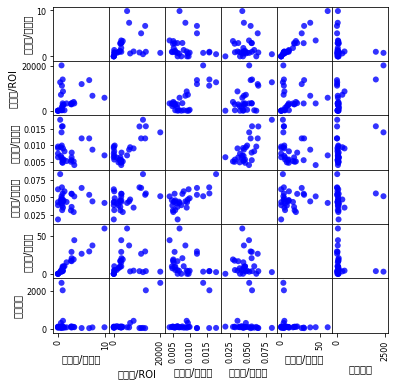

In [174]:
# 多维数据相关性分析
# 导入数据
df = tmcjtj[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 天猫直通车

In [140]:
data_tmztc

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2020/11/1,直通车,0.162022,22504.73,0.010439,0.143889,2.233184
1,2020/11/2,直通车,0.349156,19153.54,0.012375,0.110117,3.106796
2,2020/11/3,直通车,0.278500,19945.29,0.011978,0.099803,2.320611
3,2020/11/4,直通车,0.409739,17238.42,0.012633,0.089525,2.903614
4,2020/11/5,直通车,0.367981,17635.33,0.010753,0.091270,3.123457
...,...,...,...,...,...,...,...
114,2021/2/24,直通车,0.504911,4850.20,0.017825,0.086207,2.441860
115,2021/2/25,直通车,0.466628,5038.82,0.015629,0.090909,2.714286
116,2021/2/26,直通车,0.610454,4833.74,0.016388,0.096477,3.593750
117,2021/2/27,直通车,0.378001,4249.11,0.010070,0.103711,3.892857


In [149]:
sales = []
size = len(data_tmztc)
for i in range(size):
    date_tmp = data_tmztc['日期'][i]
    if date_tmp in list(sales_tmgq['日期']):
        index_tmp = sales_tmgq[sales_tmgq['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_tmgq['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_tmztc = pd.DataFrame(sales)
data_tmztc['销售数据'] = sales_tmztc
data_tmztc

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数,销售数据
0,2020/11/1,直通车,0.162022,22504.73,0.010439,0.143889,2.233184,2020.0
1,2020/11/2,直通车,0.349156,19153.54,0.012375,0.110117,3.106796,295.0
2,2020/11/3,直通车,0.278500,19945.29,0.011978,0.099803,2.320611,408.0
3,2020/11/4,直通车,0.409739,17238.42,0.012633,0.089525,2.903614,68.0
4,2020/11/5,直通车,0.367981,17635.33,0.010753,0.091270,3.123457,59.0
...,...,...,...,...,...,...,...,...
114,2021/2/24,直通车,0.504911,4850.20,0.017825,0.086207,2.441860,183.0
115,2021/2/25,直通车,0.466628,5038.82,0.015629,0.090909,2.714286,118.0
116,2021/2/26,直通车,0.610454,4833.74,0.016388,0.096477,3.593750,105.0
117,2021/2/27,直通车,0.378001,4249.11,0.010070,0.103711,3.892857,51.0


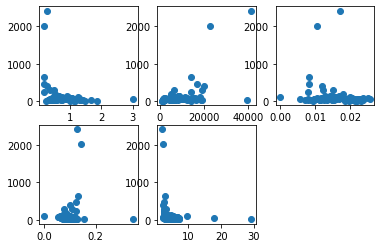

In [150]:
x1 = data_tmztc['点击率/转化率']
x2 = data_tmztc['销售额/ROI']
x3 = data_tmztc['点击量/展现量']
x4 = data_tmztc['加购数/点击量']
x5 = data_tmztc['订单数/加购数']
y = data_tmztc['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [151]:
tmztc = data_tmztc.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(tmztc['点击率/转化率'])
xs.append(tmztc['销售额/ROI'])
xs.append(tmztc['点击量/展现量'])
xs.append(tmztc['加购数/点击量'])
xs.append(tmztc['订单数/加购数'])
ys = tmztc['销售数据']

In [152]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.260，p值 =  0.005
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.561，p值 =  0.000
点击量/展现量 与 销售数据 的相关性分析: 相关系数r = -0.090，p值 =  0.337
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.192，p值 =  0.040
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.164，p值 =  0.081


- 有三项的p值都小于0.05，其中：
- “销售额/ROI”的相关系数为0.561，有显著线性关系；
- “点击量/展现量”的相关系数为-0.090，可以认为无线性关系；
- “加购数/点击量”的相关系数为0.192，可以认为无线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000 -0.452461  0.500970  0.037459  0.676748 -0.260214
销售额/ROI -0.452461  1.000000 -0.446266  0.226347 -0.159599  0.560602
点击量/展现量  0.500970 -0.446266  1.000000  0.104506  0.082327 -0.090337
加购数/点击量  0.037459  0.226347  0.104506  1.000000  0.606858  0.191923
订单数/加购数  0.676748 -0.159599  0.082327  0.606858  1.000000 -0.163606
销售数据    -0.260214  0.560602 -0.090337  0.191923 -0.163606  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

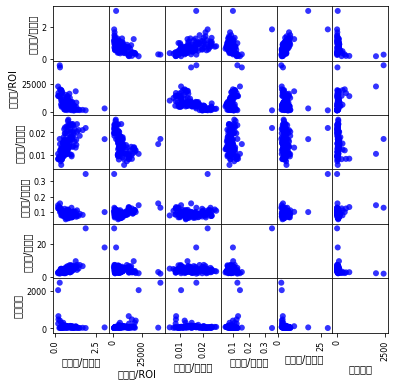

In [175]:
# 多维数据相关性分析
# 导入数据
df = tmztc[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 天猫钻展

In [153]:
data_tmzz

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2020/11/1,钻展,2.090611,15709.15709,0.028230,0.029257,2.166667
1,2020/11/2,钻展,3.716414,12177.93890,0.024736,0.022952,3.448276
2,2020/11/3,钻展,3.056792,7254.89514,0.025679,0.014001,1.666667
3,2020/11/4,钻展,13.596562,4973.12377,0.028023,0.011542,5.600000
4,2020/11/5,钻展,26.877702,5000.00000,0.030009,0.006699,6.000000
...,...,...,...,...,...,...,...
81,2021/2/23,钻展,NaN,NaN,0.000000,0.000000,0.000000
82,2021/2/24,钻展,NaN,NaN,0.000000,0.000000,0.000000
83,2021/2/25,钻展,NaN,NaN,0.000000,0.000000,0.000000
84,2021/2/26,钻展,NaN,NaN,0.000000,0.000000,0.000000


In [154]:
sales = []
size = len(data_tmzz)
for i in range(size):
    date_tmp = data_tmzz['日期'][i]
    if date_tmp in list(sales_tmgq['日期']):
        index_tmp = sales_tmgq[sales_tmgq['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_tmgq['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_tmzz = pd.DataFrame(sales)
data_tmzz['销售数据'] = sales_tmzz
data_tmzz

,日期,广告形式,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数,销售数据
0,2020/11/1,钻展,2.090611,15709.15709,0.028230,0.029257,2.166667,2020.0
1,2020/11/2,钻展,3.716414,12177.93890,0.024736,0.022952,3.448276,295.0
2,2020/11/3,钻展,3.056792,7254.89514,0.025679,0.014001,1.666667,408.0
3,2020/11/4,钻展,13.596562,4973.12377,0.028023,0.011542,5.600000,68.0
4,2020/11/5,钻展,26.877702,5000.00000,0.030009,0.006699,6.000000,59.0
...,...,...,...,...,...,...,...,...
81,2021/2/23,钻展,NaN,NaN,0.000000,0.000000,0.000000,53.0
82,2021/2/24,钻展,NaN,NaN,0.000000,0.000000,0.000000,183.0
83,2021/2/25,钻展,NaN,NaN,0.000000,0.000000,0.000000,118.0
84,2021/2/26,钻展,NaN,NaN,0.000000,0.000000,0.000000,105.0


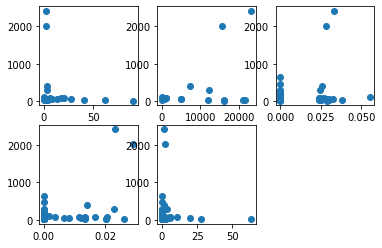

In [155]:
x1 = data_tmzz['点击率/转化率']
x2 = data_tmzz['销售额/ROI']
x3 = data_tmzz['点击量/展现量']
x4 = data_tmzz['加购数/点击量']
x5 = data_tmzz['订单数/加购数']
y = data_tmzz['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [156]:
tmzz = data_tmzz.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(tmzz['点击率/转化率'])
xs.append(tmzz['销售额/ROI'])
xs.append(tmzz['点击量/展现量'])
xs.append(tmzz['加购数/点击量'])
xs.append(tmzz['订单数/加购数'])
ys = tmzz['销售数据']

In [157]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.252，p值 =  0.298
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.457，p值 =  0.049
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.054，p值 =  0.825
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.485，p值 =  0.035
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.191，p值 =  0.433


- 有两项的p值都小于0.05，其中：
- “销售额/ROI”的相关系数为0.457，有中度线性关系；
- “点击量/展现量”的相关系数为-0.485，有中度线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.243670 -0.125243 -0.024439  0.953688 -0.251750
销售额/ROI  0.243670  1.000000 -0.016817  0.699437  0.299753  0.457401
点击量/展现量 -0.125243 -0.016817  1.000000 -0.326913 -0.118369  0.054350
加购数/点击量 -0.024439  0.699437 -0.326913  1.000000  0.142154  0.485369
订单数/加购数  0.953688  0.299753 -0.118369  0.142154  1.000000 -0.191240
销售数据    -0.251750  0.457401  0.054350  0.485369 -0.191240  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

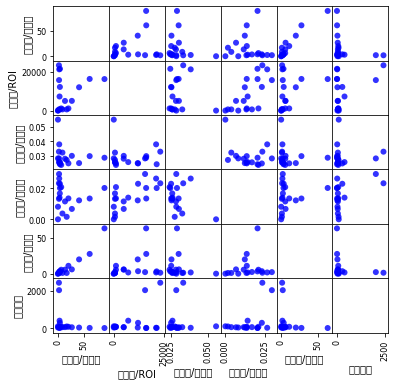

In [176]:
# 多维数据相关性分析
# 导入数据
df = tmzz[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()